In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import math

[[ 0.69617394  0.26583188]
 [ 0.57128084  0.52245927]
 [ 0.60170834  0.6794787 ]
 ..., 
 [ 0.60012381  0.02300371]
 [ 0.5659456   0.00479313]
 [ 0.57956763  0.23716673]]
In here 
741 741


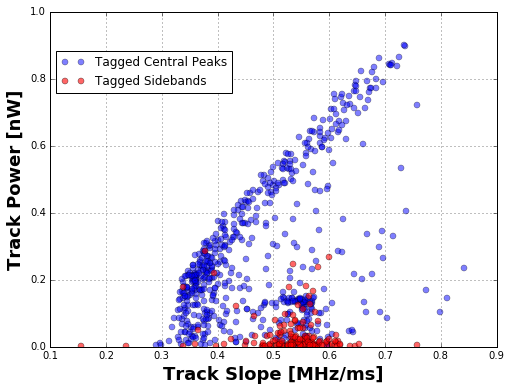

In [3]:

#Loadtxt adds things in format of text file in columns and rows
#can transpose with unpack=True
cols0 = np.loadtxt('ml_test_p8_2.txt',delimiter=',')
cols = np.transpose(np.array(cols0))

f0 =np.transpose(np.array(cols[0]))

#print f0
x = np.transpose(np.array(cols[1:-1]))
#x = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))

print x

yes = np.array([x[i] for i in xrange(len(x)) if y[i] == 1])
no = np.array([x[i] for i in xrange(len(x)) if y[i] == 0])

#print yes, no
def plotData():
    print "In here "
    plt.figure(figsize=(8,6))
    plt.plot(yes[:,0],yes[:,1],'bo',label='Tagged Central Peaks',alpha=0.5)
    plt.plot(no[:,0],no[:,1],'ro',label='Tagged Sidebands',alpha=0.6)
    plt.xlabel('Track Slope [MHz/ms]',fontsize=18,weight='bold')
    plt.ylabel('Track Power [nW]',fontsize=18,weight='bold')
    plt.legend(loc='upper left',bbox_to_anchor=(0.,0.9))
    plt.grid(True)
    
plotData()

#This is for next part, so I can rerun each cell below without messing up
x = np.insert(x,0,1,axis=1)
#f0 = np.insert(f0,0,1)

print len(f0), len(x)

In [4]:
def h(x,theta):
    z = -1 * np.dot(x,theta) 
    return 1./(1 + np.exp(z))  

def computeCost(theta,x,y,lam=0.):
    reg = float(lam) / (2*len(y)) * np.dot(theta[1:].T,theta[1:])
    return 1./len(y)*float(np.dot(-1*y.T,np.log(h(x,theta))) - \
           np.dot((1-y).T, np.log(1-h(x,theta)))) + reg

def gradientDescent(x,y,theta,alpha,iterations):
    cost = []
    for i in xrange(iterations):
        cost.append(computeCost(theta,x,y))
        theta -= alpha/len(y) * (np.dot((h(x,theta) - y).T,x )).T #.reshape(len(theta),1)
    return theta, cost

In [5]:
from scipy.optimize import fmin, minimize

new_theta = np.zeros([len(x[1]),1])
xopt = fmin(computeCost, x0 = new_theta, args=(x,y),maxiter=200)#, xtol=1e-8)

#Now check cost function
print "This better match fmin report above: ", computeCost(xopt,x,y)
print "Optimal things: ", xopt[0], xopt[1], xopt[2]

This better match fmin report above:  0.264086151432
Optimal things:  3.18687521428 -8.15986453267 23.2493937979


In here 


(0, 1)

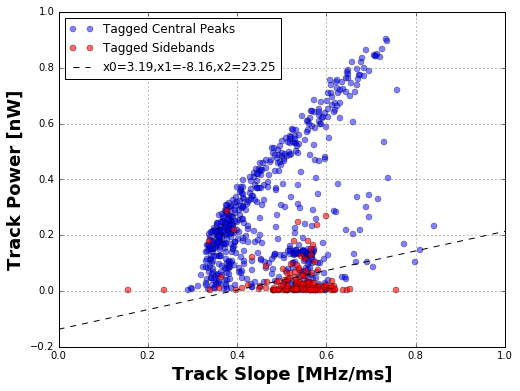

In [6]:
from pylab import meshgrid, imshow

opt_x1 = np.linspace(0,1,100)
#print opt_x1
#Decision boundary occurs when the hypoth = 0; ie, when x0 + x1t1 + x2t2 = 0  
opt_y = [ -1./xopt[2]*(xopt[0] + xopt[1]*opt_x1[i]) for i in xrange(len(opt_x1)) ]


plotData()
plt.plot(opt_x1,opt_y,'k--',label="x0=%.2f,x1=%.2f,x2=%.2f"%(xopt[0],xopt[1],xopt[2]))
#plt.ylim(28,100)
plt.legend(bbox_to_anchor=(0,1.), loc=2)
plt.savefig('TrackPowerSlope.png')
plt.xlim(0,1)
#plt.ylim(-0.1,0.5)

In [7]:
cols00 = np.loadtxt('rest_of_data.txt',delimiter=',')
cols = np.transpose(np.array(cols00))

xopt = [3.18687521428, -8.15986453267, 23.2493937979]

f0 = np.transpose(np.array(cols[0]))
x0  = np.transpose(np.array(cols[-1:-3:-1]))
print x0[0]

x0 = np.insert(x0,0,1,axis=1)

print x0.shape
f = []

it = 0 
for i in x0:
    
    if h(i,xopt) > 0.5:
        f.append(f0[it])

    it += 1 
    
print len(f), len(f0)

[ 0.3596179   0.05032935]
(1923, 3)
1547 1923


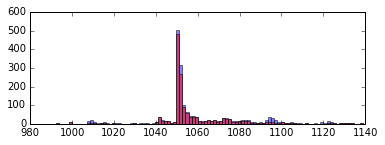

In [8]:
nbins = 100
plt.figure(figsize=(6,2))
n_counts_b,n_bins_b,_ =plt.hist(f0,bins=nbins,facecolor='blue',alpha=0.5,label="Before")
n_counts_a,n_bins_a,_ =plt.hist(f,bins=nbins,facecolor='red',alpha=0.5,label="After")

bins_b = (n_bins_b[:-1] + n_bins_b[1:])/2
bins_a = (n_bins_a[:-1] + n_bins_a[1:])/2

In [9]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

[  6.10423375e+02   1.05099051e+03   8.29752653e-01] [  5.94030809e+02   1.05096291e+03   7.71525542e-01]


(1000, 1130)

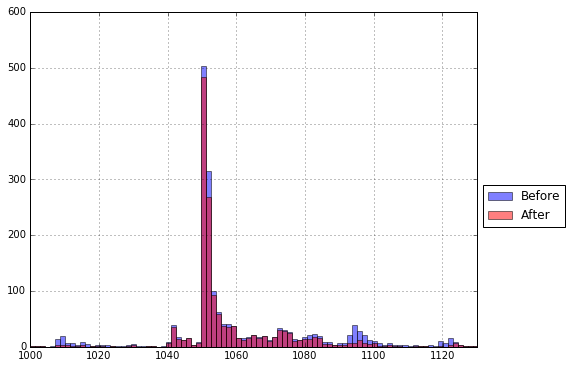

In [12]:
x_g = np.linspace(1040,1060,100)

plt.figure(figsize=(8,6))
coeff_b, _ = curve_fit(gauss, bins_b, n_counts_b, p0=([300,1049,1]))
n_counts_b,n_bins_b,_ =plt.hist(f0,bins=nbins,facecolor='blue',alpha=0.5,label="Before")

coeff_a, _ = curve_fit(gauss, bins_a, n_counts_a, p0=([300,1049,1]))

print coeff_b, coeff_a
n_counts_a,n_bins_a,_ =plt.hist(f,bins=nbins,facecolor='red',alpha=0.5,label="After")
#plt.plot(x_g, gauss(x_g,*coeff_b), 'k--',label='Before: Mean=%.2f,FWHM=%.4f'%\
#         (coeff_b[1],2*math.sqrt(2*math.log(2))*coeff_b[2]),lw=3)
#plt.plot(x_g, gauss(x_g,*coeff_a), 'g-',label='After: Mean=%.2f,FWHM=%.4f'%\
#         (coeff_a[1],2*math.sqrt(2*math.log(2))*coeff_a[2]),lw=2)
plt.grid(True)
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
#plt.yscale('log')
plt.xlim(1000,1130)

(1045, 1060)

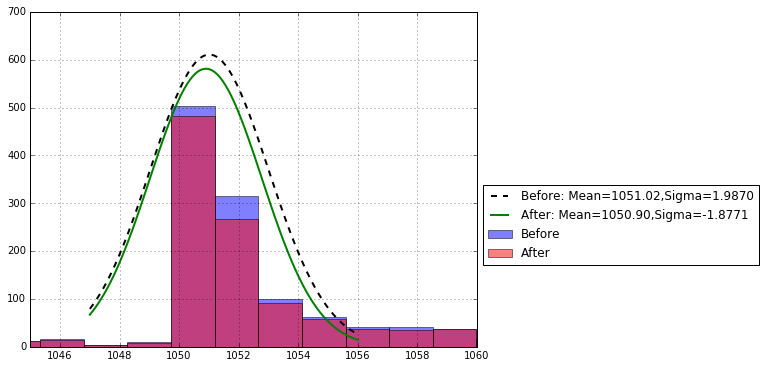

In [96]:
nbins = 100
plt.figure(figsize=(8,6))
n_counts_b,n_bins_b,_ =plt.hist(f0,bins=nbins,facecolor='blue',alpha=0.5,label="Before")
n_counts_a,n_bins_a,_ =plt.hist(f,bins=nbins,facecolor='red',alpha=0.5,label="After")

plt.plot(x_g, gauss(x_g,*coeff_b), 'k--',label='Before: Mean=%.2f,Sigma=%.4f'%\
         (coeff_b[1],coeff_b[2]),lw=2)
plt.plot(x_g, gauss(x_g,*coeff_a), 'g-',label='After: Mean=%.2f,Sigma=%.4f'%\
         (coeff_a[1],coeff_a[2]),lw=2)
plt.grid(True)
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.xlim(1045,1060)
#plt.yscale('log')


(0, 1)

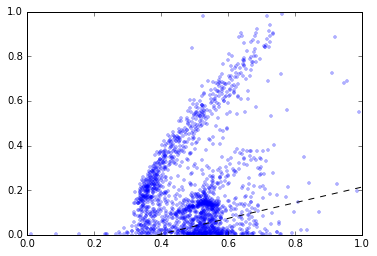

In [24]:
plt.plot(x[:,2],x[:,1],'b.',alpha=0.3)
plt.plot(opt_x1,opt_y,'k--',label="x0=%.2f,x1=%.2f,x2=%.2f"%(xopt[0],xopt[1],xopt[2]))
#plt.xlim(0,.000000001)
plt.ylim(0,1)
plt.xlim(0,1)

In [15]:
from matplotlib import cm

# OK...now build the 28 dim vector
# For the sake of time, found this website to build it:
# http://aimotion.blogspot.com/2011/11/machine-learning-with-python-logistic.html
def map_feature(x1, x2):
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 3
    out = np.ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)

    return out

In [16]:
#Find + plot decision boundary
def getContours(theta_0,xparam,yparam,lamb):
    theta_db = minimize(computeCost,theta_0,args=(xparam,yparam,lamb))
    theta_db = np.array([theta_db.x])

    x1_loop = np.arange(-2.0,2.,.1)
    x2_loop = np.arange(-2.0,2.,.1)
    y_loop = np.zeros((len(x1_loop),len(x2_loop)))
    print y_loop.shape
    for i in xrange(len(x1_loop)):
        for j in xrange(len(x2_loop)):
            x_db = map_feature(np.array([x1_loop[i]]),np.array([x2_loop[j]]))
           
            #The example plotDecisionBoundary uses this dot product
            #I don't understand why we're not using the hypothesis
            y_loop[i][j] = np.dot(theta_db,x_db.T) #h(x_db,theta_db)
    X1, X2 = meshgrid(x1_loop,x2_loop)
    CS = plt.contour(x1_loop, x2_loop, y_loop,[0])
    #print "CONTONUER : ", X1
    
    plt.clabel(CS,color='k--',fmt='lambda=%.1f'%lamb)               
    plt.title('Decision Boundary for Lambda=%.1f' % lamb)

In here 
(40, 40)


(-0.2, 2)

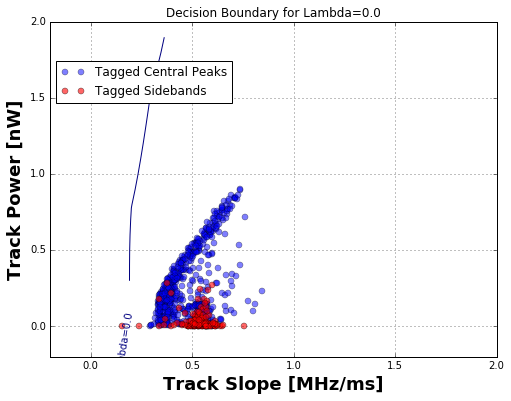

In [18]:
#Compute cost using lambda = 0
x28 = map_feature(x[:,0],x[:,1])
#theta2 = np.zeros([x28.shape[1],1])
theta_0 = np.zeros([x28.shape[1],1])
#plotData()
#getContours(theta_0,x28,y,0.)

plotData()
getContours(theta_0,x28,y,0)


plt.xlim(-0.2,2)
plt.ylim(-0.2,2)
